# Chapter 28 - Exercises

In [2]:
from scipy import stats
import math

## 28.1

### Answers

* a)
  - H0: $\mu_a = \mu_b = \mu_c = \mu_d = \mu$
  - HA: not the case that _all_ $\mu_i$ are equal
* b) 3 (4-1), 12 (16-4)
* c) 0.0003674801104182057
* d) variance of treatment groups, distribution of underlying data

In [7]:
# c
x = 13.56
dfn = 3
dfd = 12
1 - stats.f.cdf(x, dfn, dfd, loc=0, scale=1)

0.0003674801104182057

## 28.3

### Answers

* a)
  - H0: $\mu_a = \mu_b = \mu_c = \mu$
  - HA: not the case that _all_ $\mu_i$ are equal
* b) $df_{MS_T} = 2$,   $df_{MS_E} = 21$
* c) fail to reject H0; evidence doesn't support claim of significant difference in means
* d) details about variance of treatment groups; details about the distribution of the underlying data
* e) Type II

## 28.5

### Answers

* a)
  - H0: mean seconds to rise is the same under recipes A,B,C, and D
  - HA: mean seconds to rise is not the same under all recipes
* b) reject H0; evidence supports claim of at least one recipe having a mean activation time that differs from the others
* c) yes: F-test provides evidence of a difference, multiple comparison can be used to compare groups

## 28.7

### Answers

* _Both_ variables are categorical, so it's not appropriate to use ANOVA as a means of describing how the groups are associated across the two variables.
* A $\chi$-square test seems like it would be a more appropriate analysis to carry out on this data.

## 28.9

### Answers

* a) H0: mean mpg is equal across groups; HA: mean mpg is not the same across groups
* b) no: the equal variance assumption is pretty clearly violated, based on looking at the boxplots

## 28.11

### Answers

* a) H0: mean time of service is equal across tellers; HA: mean time differs across tellers
* b) P-value = 0.1914; fail to reject H0; evidence doesn't support the claim of difference in time across tellers
* c) no; given the lack of evidence supporting the claim of a differrence, it wouldn't be appropriate to continue with multiple comparison.

## 28.13

### Answers

* a) $MS_T = 8.65$, $MS_E = 0.0767$
* b) 112.78
* c) reject H0; strong evidence supporting claim of differences in means
* d) randomization; equal variances across groups; residuals nearly normal
* e) boxplot of original data; residuals vs. predicted; normal probability plot; histogram of residuals
* f) 0.277

|Source   |Sum of Squares|Degrees of Freedom|Mean Square|F-ratio|
|---------|--------------|------------------|-----------|-------|
|Treatment|        17.300|                 2|       8.65| 112.78|
|Residual |         0.460|                 6|     0.0767|       |
|Total    |        17.769|                 8|           |       |

In [3]:
math.sqrt(0.0767)

0.27694764848252457

## 28.15

### Answers

* a) H0: mean scores for both groups are equal; HA: mean scores are not equal
* b) give high F-ratio and low P-value, reject H0: mean scores are not equal
* c) yes: randomly selected, variances appear similar across groups
* d) see below

In [4]:
# d)
y1 = 6.78
se1 = 0.651
y2 = 4.66
se2 = 0.395

sp = math.sqrt(0.28998)

sep = math.sqrt(sp ** 2 / 4 + sp ** 2 / 4)
df = 6
diff = y1 - y2

t = diff / sep
print("t: {}".format(t))
print("t^2: {}".format(t ** 2))
2 * (1 - stats.t.cdf(t, df=df))

t: 5.567584742243215
t^2: 30.99799986205945


0.0014227650842359996

## 28.17

### Answers

* a) H0: mean score at each school is the same across schools; HA: mean scores differ across schools
* b) fail to reject H0 - evidence doesn't support the claim that there's a difference in mean score across groups
* c) no - he's likely seeing the occurrence of Type I errors due to running so many t-tests; if the chance of a Type I error is 5% per test, and tests were carried out for every 2 school combination, the chance of generating Type I errors is very high.

## 28.19

### Answers

* a)
  - H0: mean_1 = mean_2 = mean_3
  - HA: not all means are equal
* b) reject H0: evidence supports claim that not all the shelves have the same mean grams of sugar across boxes of cereal on that shelf
* c) no and no; only that there's at least one shelf that has a mean differing from the other shelves (i.e. not all are equal)
* d) this provides support for answering "yes" to the two questions from #c; shelf 2 shows positive mean differences when compared to shelves 1 and 3, and the P-value obtained under the Bonferroni test in both cases is < 0.05.

## 28.21

### Answers

* a) H0: mean download time in secs is the same for 3 different download time groups;
     HA: mean download time is not equal across all 3 groups
* b) F-statistic: 43.03, P-value < 0.001; reject H0; clear evidence of a difference in means
* c) No clear outliers, similar spread, residuals show no patterns of concern, normal probability plot looks good
* d) 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [18]:
data = pd.read_table("../data/Downloading.txt", names=["group", "time"], skiprows=1)
data.head()

,group,time
0,Early (7AM),68
1,Early (7AM),138
2,Early (7AM),75
3,Early (7AM),186
4,Early (7AM),68


In [19]:
morning = data[data.group == 'Early (7AM)'].time
evening = data[data.group == 'Evening (5 PM)'].time
night = data[data.group == 'Late Night (12 AM)'].time

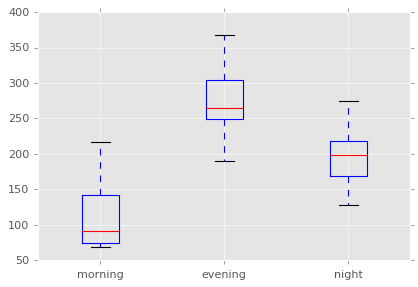

In [25]:
plt.boxplot([morning, evening, night], labels=["morning", "evening", "night"]);

In [29]:
f_1w_result = stats.f_oneway(morning, evening, night)

f_1w_result

F_onewayResult(statistic=46.0349323448656, pvalue=1.3064323282741288e-11)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('time ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq    df          F        PR(>F)
group     204640.875   2.0  46.034932  1.306432e-11
Residual  100020.125  45.0        NaN           NaN


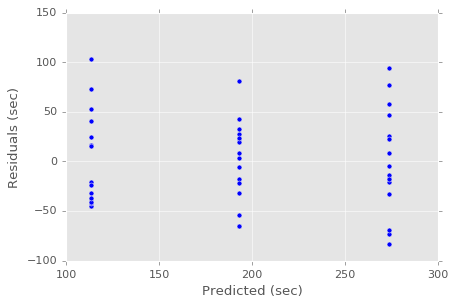

In [44]:
plt.scatter(mod.predict(data), mod.resid)
plt.xlabel("Predicted (sec)")
plt.ylabel("Residuals (sec)")
plt.show();

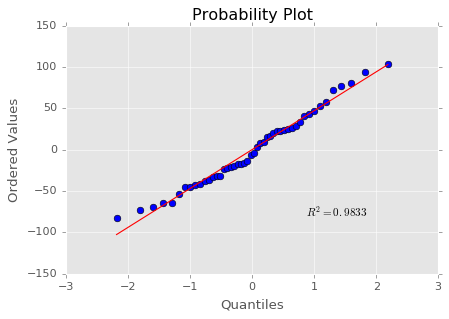

In [42]:
stats.probplot(mod.resid, plot=plt);